In [10]:
from keras.applications.vgg16 import VGG16,preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.utils import load_img,img_to_array

model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

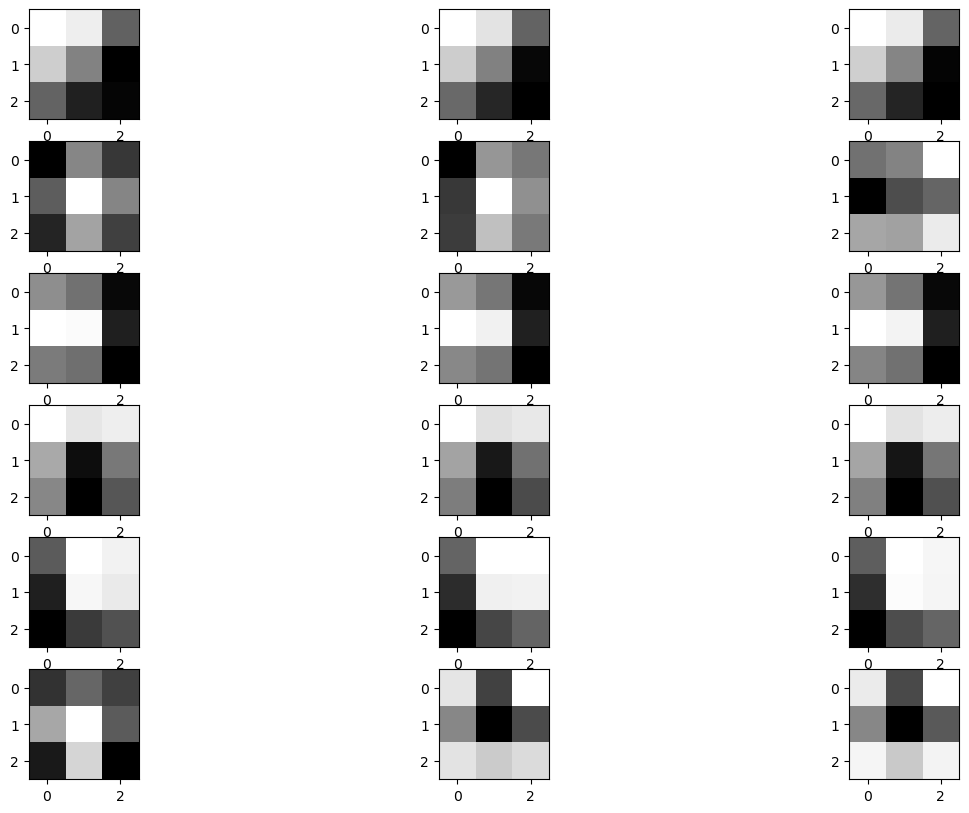

In [2]:
filters, bias = model.layers[1].get_weights()
n= 6
ix= 1
fig = plt.figure(figsize=(15,10))

for i in range(n):
    
    f= filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n,3,ix)
        plt.imshow(f[:,:,j], cmap='gray')
        ix+=1
        
plt.show()

1/1 [==============================] - 0s 452ms/step


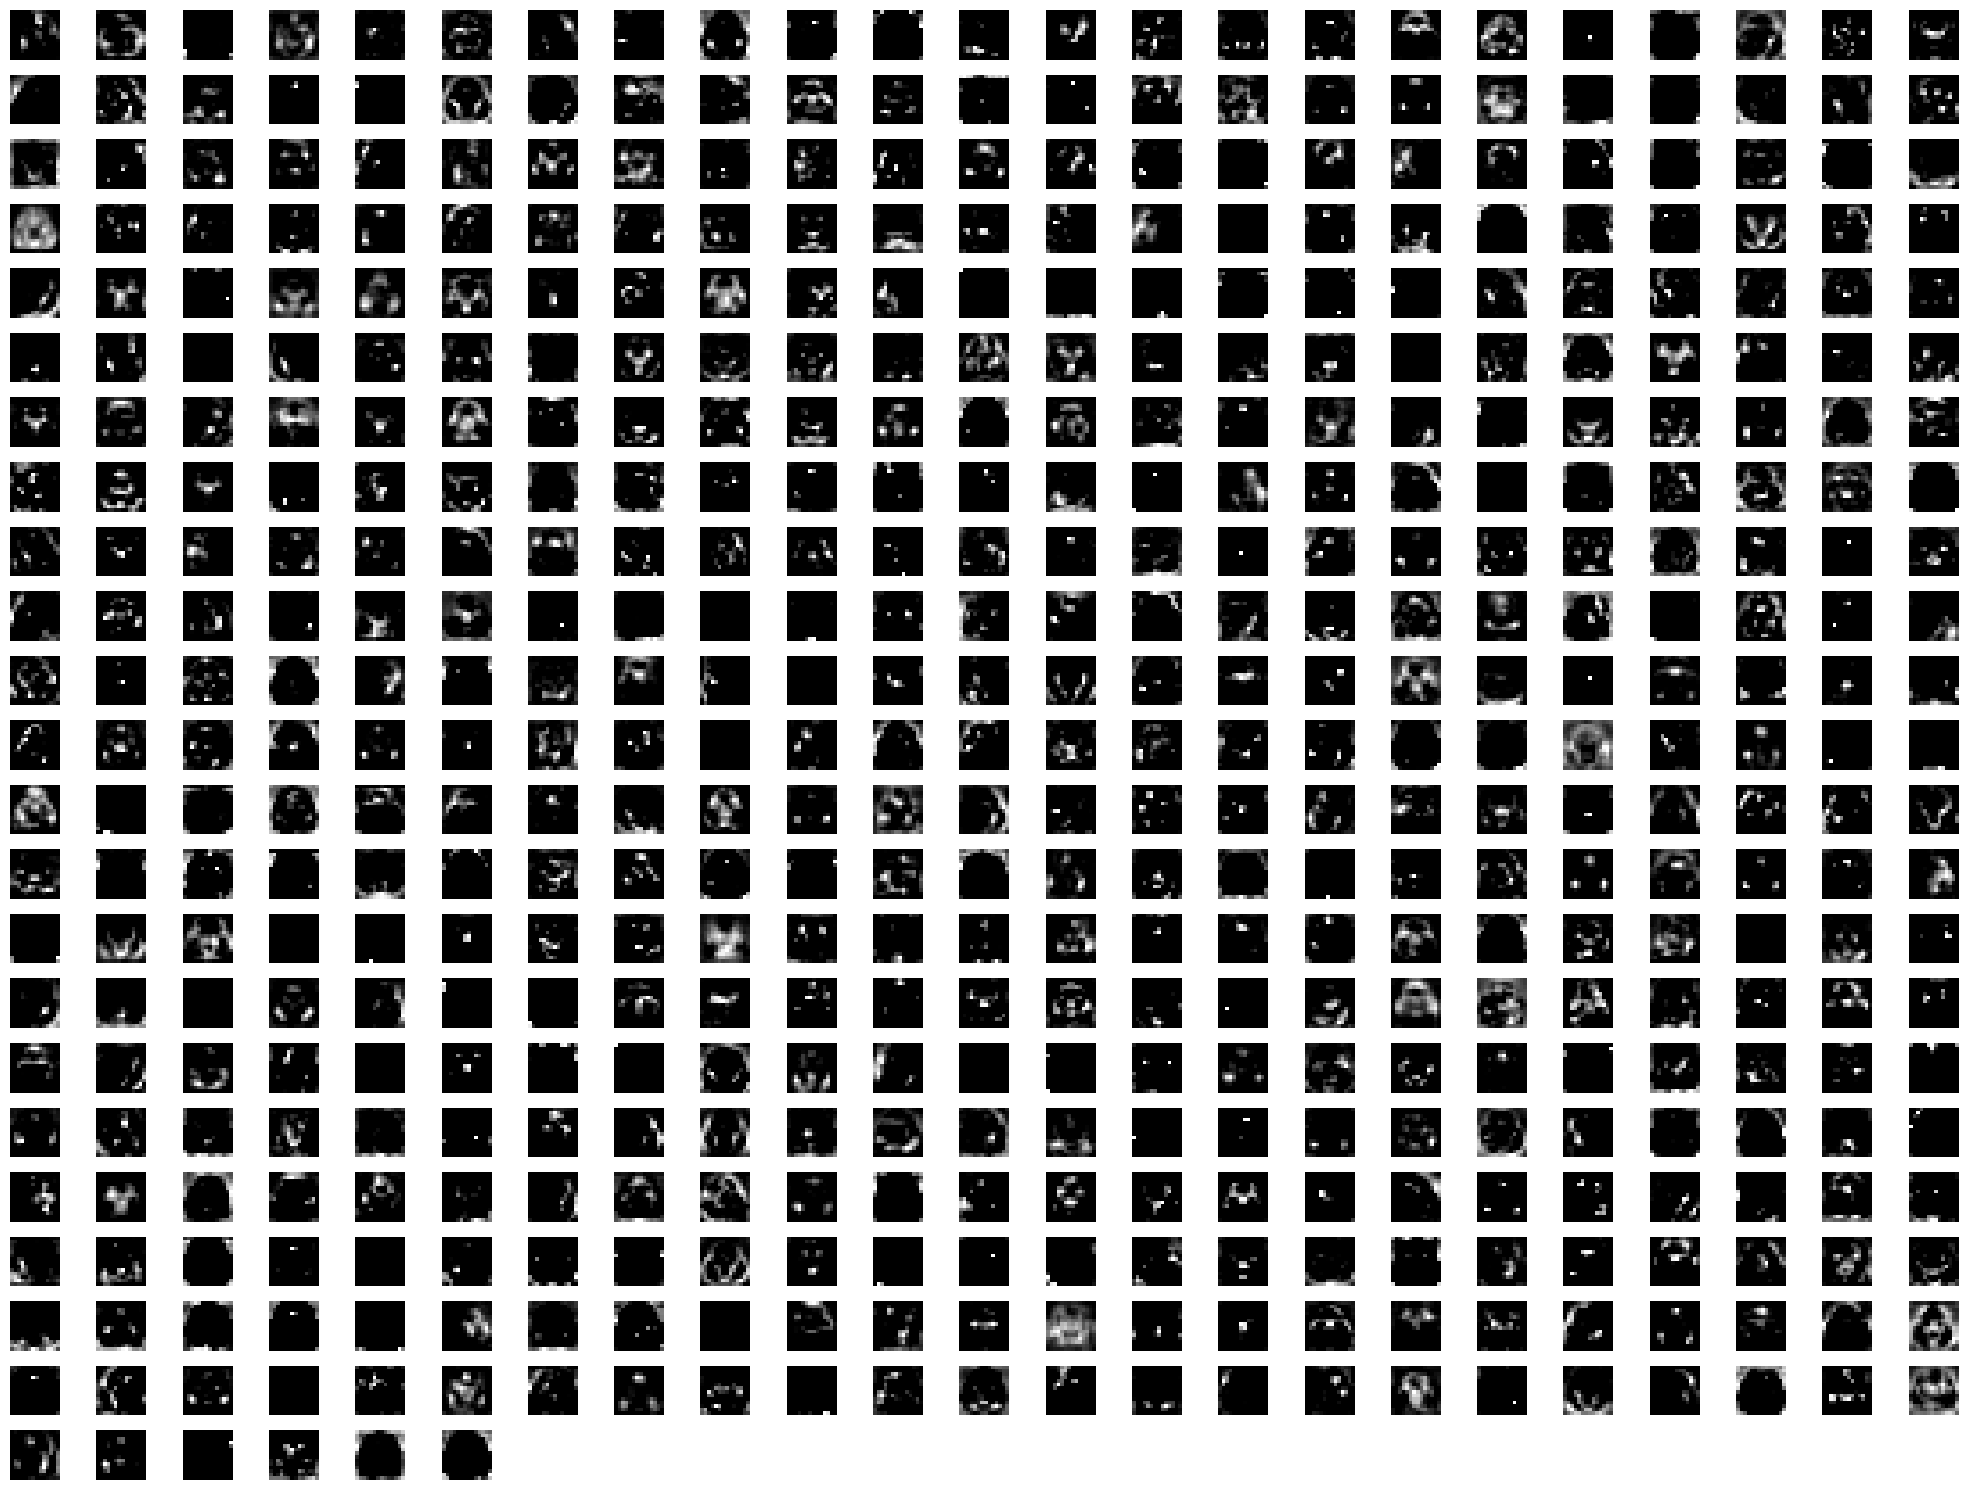

In [13]:
layer_name = 'block5_conv1'
conv_model = Model(inputs=model.inputs, outputs=model.get_layer(layer_name).output)
image = load_img("th.jpeg", target_size=(224, 224))

image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

features = conv_model.predict(image)

fig = plt.figure(figsize=(20, 15))

# Dynamically calculate grid size for the number of feature maps
num_filters = features.shape[-1]
grid_size = int(np.ceil(np.sqrt(num_filters)))

for i in range(1, num_filters + 1):
    plt.subplot(grid_size, grid_size, i)
    plt.imshow(features[0, :, :, i - 1], cmap='gray')
    plt.axis('off')  # Turn off axes for better visualization

plt.tight_layout()
plt.show()
